In [1]:
#Importing libraries
import numpy as np 
import pandas as pd 



import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("churn_problem_file.csv")
data.head();

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
"""
We notice above that TotalCharges is concidered an object or a string and trying to convert it causes and error which means that a NaN value
is hidden somewhere, we also notice that SeniorCitizen is concidered a quantitative
variable so we will have to fix this later in the Data Preparation phase.

"""
data[data["TotalCharges"]==" "];
# There we go we found the issue

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
churn = len(data["Churn"][data["Churn"]=="Yes"].values)
noChurn = len(data["Churn"][data["Churn"]=="No"].values)
print("Out of a Total number of customers of {} :\n {} customers left during the last month\n {} did not leave the company with a churn rate of {:0.2f}%\nWe notice here that the labeled class might be a bit imbalanced"
      .format(len(data["Churn"].values),churn, noChurn, churn/len(data["Churn"].values)*100))
print("The number of unique categories for each feature:\n")
for variable in data.columns:
    if variable != "customerID":
        print("{} : {} categories".format(variable,data[variable].nunique()))

Out of a Total number of customers of 7043 :
 1869 customers left during the last month
 5174 did not leave the company with a churn rate of 26.54%
We notice here that the labeled class might be a bit imbalanced
The number of unique categories for each feature:

gender : 2 categories
SeniorCitizen : 2 categories
Partner : 2 categories
Dependents : 2 categories
tenure : 73 categories
PhoneService : 2 categories
MultipleLines : 3 categories
InternetService : 3 categories
OnlineSecurity : 3 categories
OnlineBackup : 3 categories
DeviceProtection : 3 categories
TechSupport : 3 categories
StreamingTV : 3 categories
StreamingMovies : 3 categories
Contract : 3 categories
PaperlessBilling : 2 categories
PaymentMethod : 4 categories
MonthlyCharges : 1585 categories
TotalCharges : 6531 categories
Churn : 2 categories


In [7]:
abs( (data.mean() - data.median() ) / data.mean()) * 100
# We do not notice a huge variablity in our quantitative feature MonthlyCharges

SeniorCitizen     100.000000
tenure             10.414053
MonthlyCharges      8.629033
dtype: float64

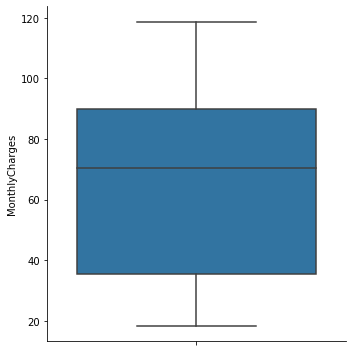

In [8]:
sns.catplot(y="MonthlyCharges", kind="box", data=data);

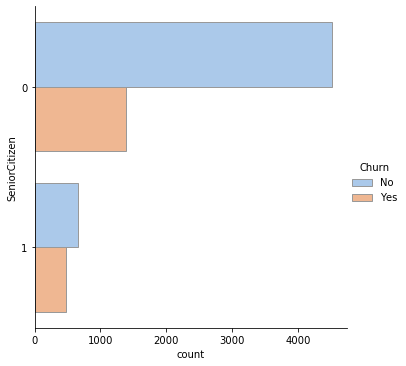

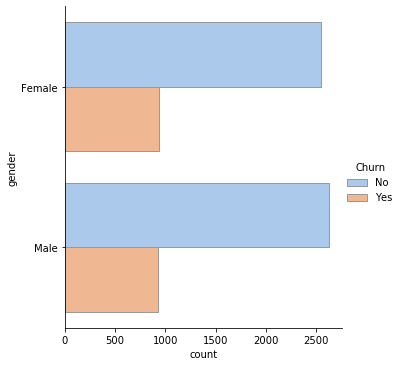

In [9]:
sns.catplot(y="SeniorCitizen", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=data);

sns.catplot(y="gender", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=data);


## <a id='Data-Preparation'>5. Data Preparation</a> ##

In [10]:
# Removing the irrelevant varible customerID 
data = data.drop(columns=['customerID'])

In [11]:
# Replacing the empty value of TatalCharges
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)

In [12]:
# Finding the number of missing data and removing it as it is a very low pourcentage
data.isna().sum();
data = data[data["TotalCharges"].notnull()]

In [13]:
# Converting object column TotalCharges to a float type
#convert to float type
data["TotalCharges"] = data["TotalCharges"].astype(float)

In [14]:
# Converting SeniorCitizen to a qualitative variable
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [15]:
# No we will encode the variables with OneHotEncoding
# Keeping in mind the dummy variable trap
encoded_quali = pd.get_dummies(data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
       ]], drop_first=True)

In [16]:
data = data.drop(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
       ])

In [17]:
encoded_data = pd.concat([encoded_quali, data], axis=1)
X = encoded_data.iloc[:,0:-1]
y = encoded_data.iloc[:,-1]

In [19]:
# last but not least we will here rescale and randomly sample from our data
# Rescaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Random sampling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Boom, we are ready for modeling

## <a id='Modeling'>6. Modeling</a> ##

In [20]:
# In this phase we are going to apply different algorithms on the data we pre-processed
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


# Creating a base instance of the models we re going to use
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
tree = DecisionTreeClassifier(random_state=42)
XGB = XGBClassifier(random_state=42, n_jobs=-1)

In [21]:
def prediction_algorithm(model, X_train, y_train, X_test, y_test):
    
    """
    this function takes a model instance and train it on X_train provided as argument
    then prints out the model's accuarcy score on both test and train data
    
    """
    
    model.fit(X_train,y_train)
    accuracyOnTestData = model.score(X_test,y_test)
    accuracyOnTrainData = model.score(X_train,y_train)
    
    print(model)
    print("==========================================================================")
    print('The Accuracy of the model on test data: {:0.3f} % '.format(accuracyOnTestData))
    print('The Accuracy of the model on train data: {:0.3f} % '.format(accuracyOnTrainData))
    print("==========================================================================")

In [22]:
# In order to automatically tune our models hyperparameters to find the best combinations
# We will start by using a random search of parameters, using 3 fold cross validation
# To narrow down what we re going to tune and then we will proceed with a grid search to find the best combination
# from the values we define.

def hyperparameters_tuning(model,grid,X_train, y_train, search_type ='grid_search'):
    
    """
    this function takes a model instance and find the best combination it 
    of hyperparameters from a defined grid
    the default search_type uses GridSearchCV class
    the alternative search_type uses RandomizedSearchCV class using search_type ='random_search'
    returns the model with the best parameters
    """
    
    if(search_type == 'random_search'):
        best_model = RandomizedSearchCV(estimator = model, param_distributions = grid, n_iter = 100,
                                    cv = 3, verbose=1, random_state=42, n_jobs = -1)
        best_model.fit(X_train, y_train)
        return best_model.best_estimator_


    
    best_model = GridSearchCV(estimator = model, param_grid = grid, 
                          cv = 3, n_jobs = -1, verbose = 1)
    best_model.fit(X_train, y_train)
        
    return best_model.best_estimator_

#### **Random Forest Classifier** ####

In [23]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,6,50]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# The function to measure the quality of a split
criterion = ['entropy', 'gini']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion':criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [24]:
# The search for the best combination starts here
# Running this cell will take an important amount of time
# as we are searching across 100 different combinations, using all of our CPU cores
rfc_tuned = hyperparameters_tuning(rfc,random_grid,X_train, y_train, search_type ='random_search')
rfc_tuned;

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.4min finished


In [25]:
# Now we will use the best parameters found by random search to find a better combination with
# grid search

# The parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [8, 10, 12],
    'min_samples_leaf': [5,6,7],
    'min_samples_split': [8, 10, 12],
    'criterion': ['gini'],
    'n_estimators': [580, 600, 620]
}

# The search commences here
final_RFC_model = hyperparameters_tuning(rfc,param_grid,X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  3.5min finished


In [26]:
prediction_algorithm(final_RFC_model,X_train, y_train, X_test, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=580,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
The Accuracy of the model on test data: 0.797 % 
The Accuracy of the model on train data: 0.836 % 


#### **Decision Tree Classifier** ####

In [27]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 40, 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [2,6,8,10,12,14,18,28]
criterion = ['entropy', 'gini']
splitter = ['best', 'random']

random_grid_tree = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'criterion': criterion,
    'splitter':splitter
}

In [28]:
# The search for the best combination starts here
# Running this cell will take an important amount of time
# as we are searching across 100 different combinations, using all of our CPU cores
tree_tuned = hyperparameters_tuning(tree,random_grid_tree,X_train, y_train, search_type ='random_search')
tree_tuned;

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.3s finished


In [29]:
param_grid_tree = {
    'max_depth': [4,5,6,150],
    'min_samples_leaf': [13,14,15],
    'min_samples_split': [8,10,12,14],
}
final_TREE_model = hyperparameters_tuning(tree,param_grid_tree,X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    1.1s finished


In [30]:
prediction_algorithm(final_TREE_model,X_train, y_train, X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=13, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
The Accuracy of the model on test data: 0.784 % 
The Accuracy of the model on train data: 0.792 % 


#### **AdaBoost Classifier** ####

In [31]:
# Wel will base our adaboost classifier on the previous models
ADA = AdaBoostClassifier(random_state=42)

In [32]:

random_grid_ada = {
    'n_estimators' : [int(x) for x in np.linspace(50, 300, 6)]
}

In [33]:
final_ADA = hyperparameters_tuning(ADA,random_grid_ada,X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    9.2s finished


In [34]:
prediction_algorithm(final_ADA,X_train, y_train, X_test, y_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)
The Accuracy of the model on test data: 0.792 % 
The Accuracy of the model on train data: 0.811 % 


#### **XGBoost Classifier** ####

In [36]:
XGB_grid = {
    "learning_rate"    : [0.05, 0.15, 0.30 ] ,
    "max_depth"        : [ 4, 8, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
}

# max_depth : Maximum tree depth for base learners.
# learning_rate : The amount that the weights are updated during training is referred to as the step size 
# gamma : the Lagrangian multiplier

In [37]:
final_XGB = hyperparameters_tuning(XGB,XGB_grid,X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  8.4min finished


In [38]:
prediction_algorithm(final_XGB,X_train, y_train, X_test, y_test)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
The Accuracy of the model on test data: 0.798 % 
The Accuracy of the model on train data: 0.841 % 


## <a id="Evaluation">7. Evaluation</a> ##

At this point we will use different matrics to evaluate our models's overall performance


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
def model_eval(model, X_test, y_test):
    accuracyOnTestData = model.score(X_test,y_test)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test,y_pred)
    print("==========================================================================")
    print('The Accuracy of the model on test data: {:0.3f} % '.format(accuracyOnTestData))
    print("==========================================================================")
    print(classification_report(y_test, y_pred))
    print("==========================================================================")
    fig = plt.figure(figsize=(5,5))
    sns.heatmap(conf_matrix,
                linewidths = 1,
                linecolor = "black",
                fmt = "d",
                annot=True,
                xticklabels= ["Predict No Churn","Predict Churn"],
                yticklabels=["No Churn","Churn"],
                cmap = "coolwarm"
                )
    plt.title("Confusion Matrix",color = "b")
    
    

#### **Random Forest Classifier Evaluation** ####

The Accuracy of the model on test data: 0.797 % 
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1033
         Yes       0.66      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407



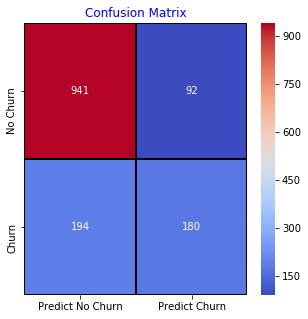

In [41]:
model_eval(final_RFC_model, X_test, y_test)

#### **Decision Tree Classifier Evaluation** ####

The Accuracy of the model on test data: 0.784 % 
              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1033
         Yes       0.61      0.53      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



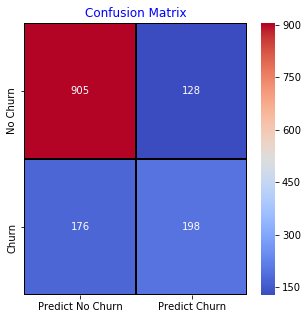

In [42]:
model_eval(final_TREE_model, X_test, y_test)

#### **AdaBoost Classifier Evaluation** ####

The Accuracy of the model on test data: 0.792 % 
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1033
         Yes       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



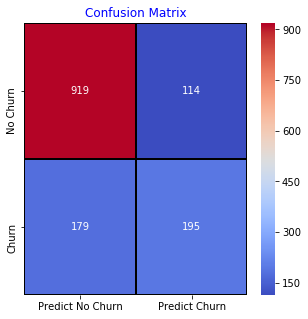

In [43]:
model_eval(final_ADA, X_test, y_test)

#### **XGBoost Classifier Evaluation** ####

The Accuracy of the model on test data: 0.798 % 
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1033
         Yes       0.65      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



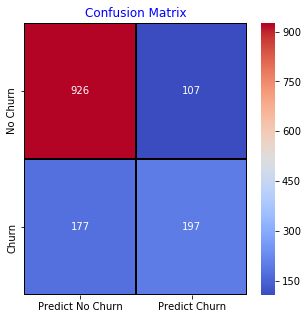

In [44]:
model_eval(final_XGB, X_test, y_test)

At the end of our evaluation we notice that the models performed decently on the data with a slight edfe for Random Forest Classifier<br>
and XGBoost. <br>
Even though our models are perfoming well on the "No churn" Class, with high accuarcy we notice that their accuarcy drops when trying <br>
to predict the "Churn" Class. We are potentially facing an imbalanced classes problem as the models adapt their learning to the dominant
class

## **Author: Hamdi "NoName" Saidi** ##